In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
conn.commit()

In [26]:
cursor.execute("DELETE FROM sales")

sample_data = [
    ("Pen", 100, 55),
    ("Pen", 220, 50),
    ("Notebook", 25, 50),
    ("Notebook", 220, 50),
    ("Pencil", 320, 22),
    ("drowing book",320,30),
    ("rubber",320,22),
    ("shopner",320,33)
]

cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", 
    sample_data
)
conn.commit()

In [27]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Step 6: Print Results
print("Sales Summary:\n")
print(df)

Sales Summary:

        product  total_qty  revenue
0      Notebook        245  12250.0
1           Pen        320  16500.0
2        Pencil        320   7040.0
3  drowing book        320   9600.0


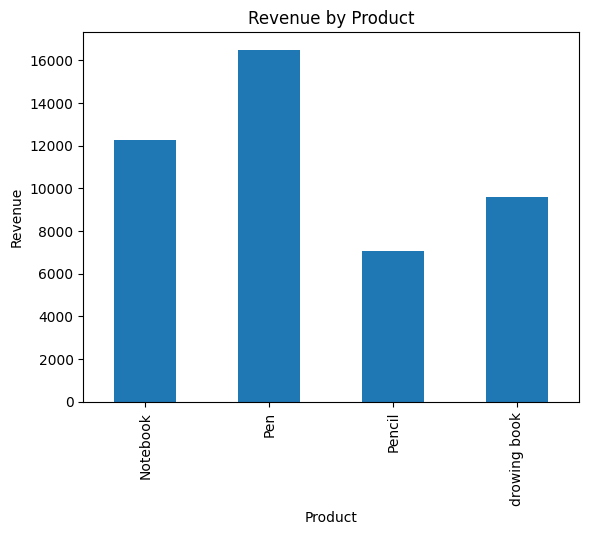

In [28]:
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.show()


In [29]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>